**Part 1 Data Mining By Christian Gauthier**

*Sonar Detection Model - Using Nearest Neighbours*

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Read the csvs
df_train = pd.read_csv('sonar_train.csv')
df_test = pd.read_csv('sonar_test.csv')

print("Train Sample")
print(df_train.sample)

Train Sample
<bound method NDFrame.sample of          A1      A2      A3      A4      A5      A6      A7      A8      A9  \
0    0.0079  0.0086  0.0055  0.0250  0.0344  0.0546  0.0528  0.0958  0.1009   
1    0.0599  0.0474  0.0498  0.0387  0.1026  0.0773  0.0853  0.0447  0.1094   
2    0.0093  0.0269  0.0217  0.0339  0.0305  0.1172  0.1450  0.0638  0.0740   
3    0.0151  0.0320  0.0599  0.1050  0.1163  0.1734  0.1679  0.1119  0.0889   
4    0.0317  0.0956  0.1321  0.1408  0.1674  0.1710  0.0731  0.1401  0.2083   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
134  0.0731  0.1249  0.1665  0.1496  0.1443  0.2770  0.2555  0.1712  0.0466   
135  0.0516  0.0944  0.0622  0.0415  0.0995  0.2431  0.1777  0.2018  0.2611   
136  0.0015  0.0186  0.0289  0.0195  0.0515  0.0817  0.1005  0.0124  0.1168   
137  0.0411  0.0277  0.0604  0.0525  0.0489  0.0385  0.0611  0.1117  0.1237   
138  0.0270  0.0163  0.0341  0.0247  0.0822  0.1256  0.1323  0.1584  0.2017   

      

In [2]:
print("Test Sample")
print(df_test.sample)

Test Sample
<bound method NDFrame.sample of         A1      A2      A3      A4      A5      A6      A7      A8      A9  \
0   0.0125  0.0152  0.0218  0.0175  0.0362  0.0696  0.0873  0.0616  0.1252   
1   0.0530  0.0885  0.1997  0.2604  0.3225  0.2247  0.0617  0.2287  0.0950   
2   0.0368  0.0279  0.0103  0.0566  0.0759  0.0679  0.0970  0.1473  0.2164   
3   0.0164  0.0173  0.0347  0.0070  0.0187  0.0671  0.1056  0.0697  0.0962   
4   0.0216  0.0124  0.0174  0.0152  0.0608  0.1026  0.1139  0.0877  0.1160   
..     ...     ...     ...     ...     ...     ...     ...     ...     ...   
64  0.0203  0.0121  0.0380  0.0128  0.0537  0.0874  0.1021  0.0852  0.1136   
65  0.0117  0.0069  0.0279  0.0583  0.0915  0.1267  0.1577  0.1927  0.2361   
66  0.0308  0.0339  0.0202  0.0889  0.1570  0.1750  0.0920  0.1353  0.1593   
67  0.0526  0.0563  0.1219  0.1206  0.0246  0.1022  0.0539  0.0439  0.2291   
68  0.0181  0.0146  0.0026  0.0141  0.0421  0.0473  0.0361  0.0741  0.1398   

       A10  ...    

In [3]:
#Seperate the predictors and labels from datasets
x_train = df_train.iloc[:, :-1]
y_train = df_train.iloc[:,-1:].values

x_test = df_test.iloc[:, :-1]
y_test = df_test.iloc[:,-1:].values

*Standardize The Data*

For the model to create representations within the data the predictors are standarized by removing the mean and scaling the values so that the distribution mean will be zero and standard deviation of 1. 

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

*Minkowski Distance*

Distance between points in an N-dimentional space, given by the sum to (|Xi – Yi|)^1/q

Manhattan distance is the sum of all real distances between points, producing a stair like path formation between points, whilst Euclidian distance is the shortest path between the points producing a straight line. To get the different distances, a value of q is changed within the Minkowski distance formula:

For Manhattan Distance q = 1, Euclidian Distance q = 2

In [5]:
def minkowski_distance(x, y, q):
    return np.sum(np.abs(x - y)**q)**(1/q) # value of q changes depending on what type of distance

In [6]:
def nearest_neighbour(Xtrain, ytrain, Xtest, q):
    y_pred = []
    for i in range(Xtest.shape[0]):
        distances = []
        for j in range(Xtrain.shape[0]):
            dist = minkowski_distance(Xtest[i], Xtrain[j], q)
            distances.append((dist, ytrain[j]))
        distances.sort()
        y_pred.append(distances[0][1])
    return y_pred

In [57]:
#Classification using different Minkowski Distances
y_pred_Man = nearest_neighbour(x_train, y_train, x_test, 1)
y_pred_Euc = nearest_neighbour(x_train, y_train, x_test, 2)

*Evaluating Train Results*

To evaluate the results, first the performance of the different distances has to be found by taking count of all the correct predictions by finding the false and positives of the data

For this task, the value of M is the positive class whilst R is Negative

Columns = Actual

Rows = Predicted

| | M | R |
| --- | --- | --- |
| M | True Positive | False Positive |
| R | False Negative | True Negative |


Evaluation Metrics:

Accuracy: Correctly predicicted results = (tp + tn) / (tp + fp + tn + fn)

Precision: Positive class predictions belonging to positive class = tp / (tp + fp)

Recall: Negative class predictions belonging to negative class = tp / (tp + fn)

F1: Single score balancing both precision and recall measuring overall performance = 2 * precision * recall / (precision + recall)

In [55]:
def scorer(prediction_group):
    tp = 0
    fp = 0
    fn = 0
    tn = 0
    #Run through all the different possibilities of positive and negative
    for i in range (len(prediction_group)):
        if(prediction_group[i] == 'M' and  y_test[i] == 'M'):
            tp+=1;
        elif(prediction_group[i] == 'M' and  y_test[i] != 'M'):
            fp+=1;
        elif(prediction_group[i] != 'M' and  y_test[i] == 'M'):
            fn+=1;
        elif(prediction_group[i] != 'M' and  y_test[i] != 'M'):
            tn+=1;
    accuracy = (tp + tn) / (tp + fp + tn + fn)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1 = 2 * precision * recall / (precision + recall)
    print(tp,fp,fn,tn)
    return accuracy,precision,recall,f1

In [58]:
results = []
acc_man, prec_man, rec_man, f1_man = scorer(y_pred_Man)
acc_euc, prec_euc, rec_euc, f1_euc = scorer(y_pred_Euc)
results.append(scorer(y_pred_Man))
results.append(scorer(y_pred_Euc))

36 4 1 28
36 4 1 28
36 4 1 28
36 4 1 28


In [59]:
print(results)

[(0.927536231884058, 0.9, 0.972972972972973, 0.935064935064935), (0.927536231884058, 0.9, 0.972972972972973, 0.935064935064935)]


**Results**

*Manhattan Distance*

In [60]:
print('Accuracy: {:.2f}'.format(acc_man))
print('Precision: {:.2f}'.format(prec_man))
print('Recall: {:.2f}'.format(rec_man))
print('F1 Score: {:.2f}'.format(f1_man))

Accuracy: 0.93
Precision: 0.90
Recall: 0.97
F1 Score: 0.94


*Euclidian Disatnce* 

In [61]:
print('Accuracy: {:.2f}'.format(acc_euc))
print('Precision: {:.2f}'.format(prec_euc))
print('Recall: {:.2f}'.format(rec_euc))
print('F1 Score: {:.2f}'.format(f1_euc))

Accuracy: 0.93
Precision: 0.90
Recall: 0.97
F1 Score: 0.94


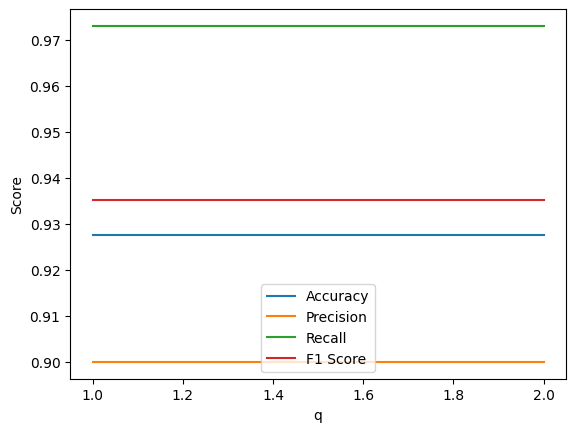

In [62]:
qpos = range(1,3)
results = np.array(results)
plt.plot(qpos, results[:,0], label='Accuracy')
plt.plot(qpos, results[:,1], label='Precision')
plt.plot(qpos, results[:,2], label='Recall')
plt.plot(qpos, results[:,3], label='F1 Score')
plt.legend()
plt.xlabel('q')
plt.ylabel('Score')
plt.show()

*Part A Evaluation*

For the value of q = 1 and q = 2, the same results are achieved with results of:
Accuracy: 0.93
Precision: 0.90
Recall: 0.97
F1 Score: 0.94

For the next stage of experimentation, q values between 1 and 20 will be tested.

In [67]:
qpos = range(1,21)
results = []
for i in qpos:
    y_pred = nearest_neighbour(x_train, y_train, x_test, i)
    results.append(scorer(y_pred))

36 4 1 28
36 4 1 28
36 5 1 27
36 6 1 26
36 5 1 27
35 5 2 27
34 5 3 27
34 6 3 26
34 7 3 25
33 7 4 25
33 7 4 25
33 8 4 24
33 8 4 24
33 8 4 24
33 8 4 24
33 9 4 23
33 9 4 23
33 9 4 23
32 9 5 23
32 9 5 23


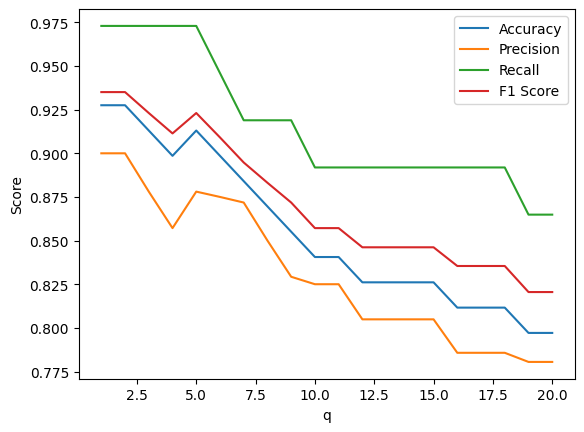

In [68]:
results = np.array(results)
plt.plot(qpos, results[:,0], label='Accuracy')
plt.plot(qpos, results[:,1], label='Precision')
plt.plot(qpos, results[:,2], label='Recall')
plt.plot(qpos, results[:,3], label='F1 Score')
plt.legend()
plt.xlabel('q')
plt.ylabel('Score')
plt.show()

**Part B Evaluation**

For the best results on the test set, both the values of q = 1 and q = 2 performed at the same level with an overall f1 score of 0.935

As the value of q increased, all evaluation scores decreased with the worst performance being q = 20 with an f1 score of just over 0.78